# Network Comparison

## Maximum and Standard Deviation of Validation Accuracy

In [ ]:
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


names = {
    'mnist': 'MNIST',
    'fashion_mnist': 'Fashion MNIST',
    'cifar10': 'CIFAR10',
    'imdb': 'IMDB',
    'lenet': 'LeNet',
    'lstm': 'LSTM'
}


def show(dataset_name, model_name):
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.suptitle(f'{names[dataset_name]} {names[model_name]}', fontsize=18, y=1.02)
    ax1.set_title('Maximum Validation Accuracy')
    ax2.set_title('Standard Deviation of Validation Accuracy')
    
    data = {}
    dir_paths = glob(f'../data/{dataset_name}_{model_name}_*')
    dir_paths.sort()
    for dir_path in dir_paths:
        optimizer_name = re.search(r'../data/.+_.+_(.+)', dir_path).group(1)
        temp = []
        for path in glob(f'{dir_path}/*/result.csv'):
            with open(path) as f:
                rows = np.array([row for row in csv.reader(f)])
            idx = np.where(rows[0] == 'val_accuracy')[0]
            row = rows[1:, idx]
            row = row.reshape(len(row))
            row = row.astype(np.float)
            temp.append(row)
        data[optimizer_name] = np.mean(np.array(temp), axis=0)
    
    optimizer_names, ys = list(data.keys()), list(data.values())
    max_ys = [np.max(y) for y in ys]
    std_ys = [np.std(y) for y in ys]
    x = [i for i in range(len(ys))]
        
    ax1.bar(x, max_ys, align='center', tick_label=optimizer_names)
    ax2.bar(x, std_ys, align='center', tick_label=optimizer_names)
    ax1.set_xticklabels(optimizer_names, rotation=45)
    ax2.set_xticklabels(optimizer_names, rotation=45)
    
    d = (max(max_ys) - min(max_ys)) / 10
    ax1.set_ylim(min(max_ys) - d, max(max_ys) + d)
    
    d = (max(std_ys) - min(std_ys)) / 10
    ax2.set_ylim(min(std_ys) - d, max(std_ys) + d)

    plt.show()

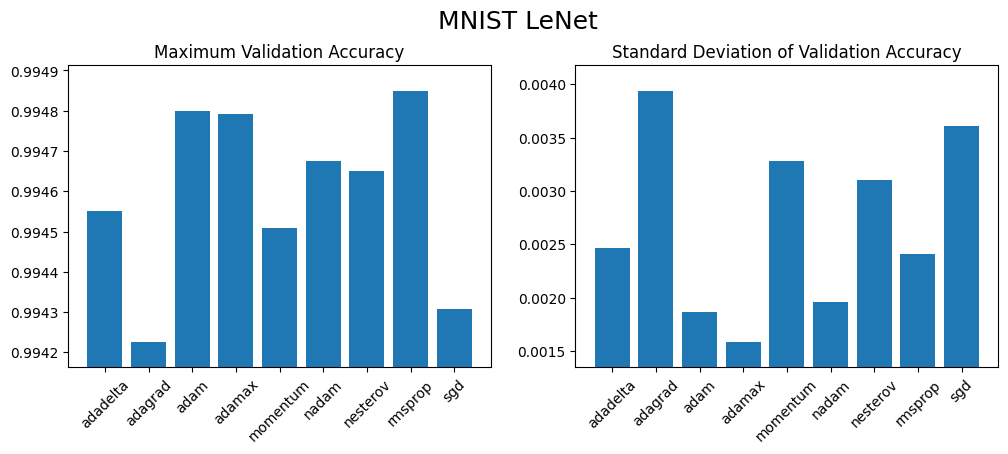

In [205]:
show('mnist', 'lenet')

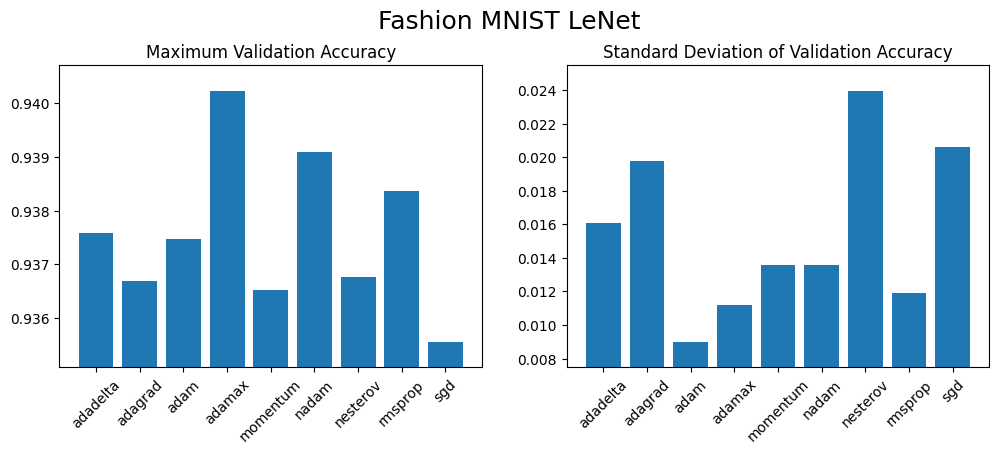

In [206]:
show('fashion_mnist', 'lenet')

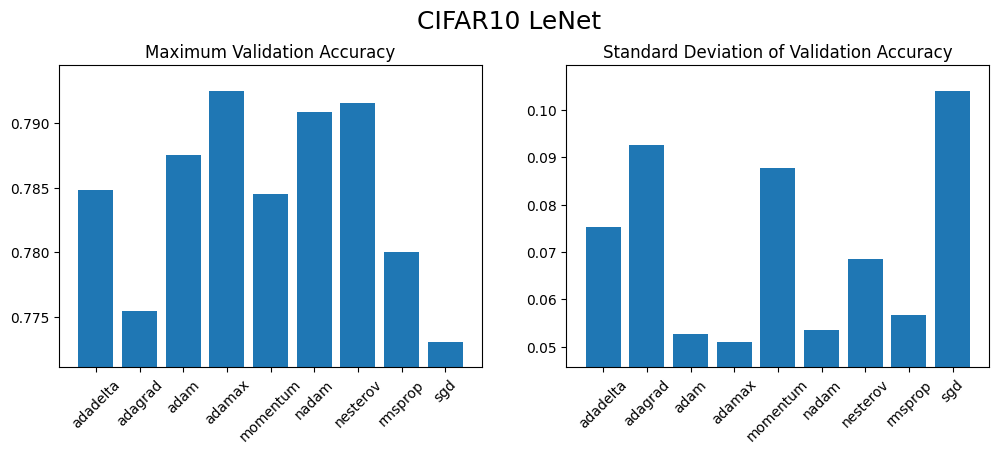

In [207]:
show('cifar10', 'lenet')

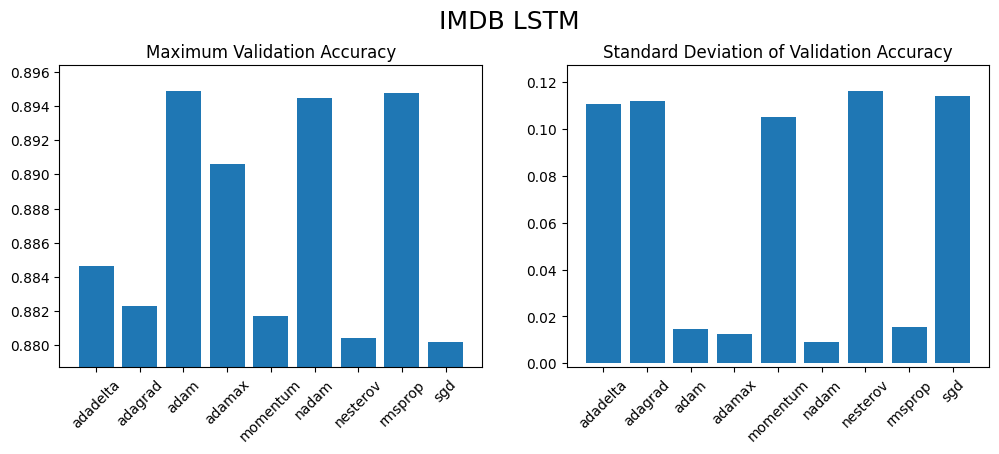

In [208]:
show('imdb', 'lstm')